## Read in v_catch_summary_v2 for marinovich

Based on the HLY2801 Methot Catch Summary notebook, here I plot the georeferenced pie plots of catch.  I've consolidated evrything into the functions in the first cell so the calls can be executed on any year dataset from clams.

I changed from using viridis to definign my own colors:
[0,0,1] # blue
[0,.6,0] # green
[1,0,0] # red
[.5,.5,.1] # brown
[0,0,.4] # dark blue
[.7,0,.7] # purple
[.9,.6,0] # orange
[.9,.6,.8] # pink

In [31]:
import pandas as pd
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib import rcParams
from matplotlib.patches import Patch

etopo1name = 'D:/AIESII/Data/etopo1.asc'
topo_file = open(etopo1name, 'r')
ncols = int(topo_file.readline().split()[1])
nrows = int(topo_file.readline().split()[1])
xllcorner = float(topo_file.readline().split()[1])
yllcorner = float(topo_file.readline().split()[1])
cellsize = float(topo_file.readline().split()[1])
topo_file.close()
dres = 1
etopo = np.loadtxt(etopo1name, skiprows=5)
etopo[:nrows+1, :] = etopo[nrows+1::-1, :]
etopo = etopo[::dres, ::dres]

# Create longitude and latitude vectors for etopo
lons = np.arange(xllcorner, xllcorner+cellsize*ncols, cellsize)[::dres]
lats = np.arange(yllcorner, yllcorner+cellsize*nrows, cellsize)[::dres]

# Draw etopo1, first for land and then for the ocean, with different colormaps
llevels = np.arange(-500,2251,100) # check etopo.ravel().max()
#lcs = m.contourf(rlons, rlats, etopo, llevels, cmap=cm.terrain)
#olevels = np.arange(-3500,1,100) # check etopo.ravel().min()
olevels1 = [-200,-150,-100,-50,0]
olevels2 = [-2000,-1500,-1000,-500]
olevels3 = [0,10000]
olevels4 = [0]

def draw_pie(ax,ratios=[0.4,0.3,0.3], X=0, Y=0, size = 1000):
    N = len(ratios)
    xy = []
    s =[]
    col=[]
    start = 0.
    ct = 0
    colors =[[0,0,1],[0,.6,0], [1,0,0] ,[.5,.5,.1] ,[0,0,.4],[.8,.8,.4],[.6,.2,.2],[1,1,1],[.7,0,.7] ,[.9,.6,0] ,[.9,.6,.8],[.3,.3,.3]]
    for ratio in ratios:
        if ratio > 0:
            #col.append(plt.cm.viridis.colors[0::int(len(plt.cm.viridis.colors)/len(marByGroup.group.unique())-1)][1:][ct])
            col.append(colors[ct])
            x = [0] + np.cos(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
            y = [0] + np.sin(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
            xy1 = list(zip(x,y))
            xy.append(xy1)
            s1 = np.abs(xy1).max()
            s.append(s1)
            start += ratio
        ct+=1
    ct = 0
    for xyi, si in zip(xy,s):
        ax.scatter([X],[Y] , marker=(xyi,0), s=size*si**2, facecolor=col[ct],transform=ccrs.Geodetic(), zorder=6,edgecolor="k")
        ct+=1

def pieMap(marEvents, marByGroup, year):
    figure = plt.figure(figsize=(20,20),dpi=300)
    rlons, rlats = (np.meshgrid(lons,lats[:-1]))
    rcParams['contour.negative_linestyle'] = 'solid'
    ax=plt.subplot(121,projection=ccrs.Mercator())
    rcParams['lines.linewidth'] = .5
    lfill = ax.contourf(rlons, rlats, etopo, olevels3, colors ='grey',transform=ccrs.PlateCarree(),zorder=4)#cmap=cm.ocean)
    cso1 = ax.contour(rlons, rlats, etopo, olevels1, colors ='grey',transform=ccrs.PlateCarree(),zorder=1)#cmap=cm.ocean)
    cso2 = ax.contour(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=2)#cmap=cm.ocean)
    cso4 = ax.contour(rlons, rlats, etopo, olevels4, colors ='k',transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
    #ax1.set_extent([-155,-171,59,72.7])

    #ax.plot(marEvents.LONGITUDE,marEvents.LATITUDE,'kx',transform=ccrs.Geodetic(),markersize = 15)
    for event in marByGroup.event.unique():
        X = marEvents.LONGITUDE[marEvents.CLAMS_EVENT_NUMBER == event].values[0]
        Y = marEvents.LATITUDE[marEvents.CLAMS_EVENT_NUMBER == event].values[0]
        draw_pie(ax,np.round([x/sum(marByGroup[marByGroup.event == event].number.values) for x in marByGroup[marByGroup.event == event].number.values],3), X, Y,size=800)

    #ax.plot(mooringRecover.LONGITUDE,mooringRecover.LATITUDE,'.',transform=ccrs.Geodetic(),markersize = 10)
    ax.set_extent([-155,-172,64,73.5])
    #ax.legend(['Vessel Trackline','Bio-Physical Stations','Midwater Trawls'], loc = 7, fontsize='x-large')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlocator = mticker.FixedLocator([-172,-170, -166, -162,-158, -154,-152])
    gl.ylocator = mticker.FixedLocator([57,65,67, 69, 71,73,75])
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size':20}
    gl.ylabel_style = {'size':20}
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #display(Markdown('### Complete Coverage Map'))

    grpLabel = ['Jellyfish', 'Sand lance','Stichaedae', 'Cottidae','Capelin','Herring','Smelts','Other fishes','Arctic cod', 'Saffron cod','Pacific cod', 'Walleye pollock']
    colors =[[0,0,1],[0,.6,0], [1,0,0] ,[.5,.5,.1] ,[0,0,.4],[.8,.8,.4],[.6,.2,.2],[1,1,1],[.7,0,.7] ,[.9,.6,0] ,[.9,.6,.8],[.3,.3,.3]]

    legendElements = [Patch(facecolor = colors[0], label=grpLabel[0]),
                     Patch(facecolor = colors[1], label=grpLabel[1]),
                     Patch(facecolor = colors[2], label=grpLabel[2]),
                     Patch(facecolor = colors[3], label=grpLabel[3]),
                     Patch(facecolor = colors[4], label=grpLabel[4]),
                     Patch(facecolor = colors[5], label=grpLabel[5]),
                     Patch(facecolor = colors[6], label=grpLabel[6]),
                     Patch(facecolor = colors[7], label=grpLabel[7]),
                     Patch(facecolor = colors[8], label=grpLabel[8]),
                     Patch(facecolor = colors[9], label=grpLabel[9]),
                     Patch(facecolor = colors[10], label=grpLabel[10]),
                     Patch(facecolor = colors[11], label=grpLabel[11])]
                     #Patch(facecolor = plt.cm.viridis.colors[0::int(len(plt.cm.viridis.colors)/len(marByGroup.group.unique())-1)][1:][7], label=grpLabel[7])]
    plt.title(str(year)+' Midwater Catch by Abundance',fontsize=20)
    plt.legend(handles=legendElements,loc='upper right',fontsize=16,bbox_to_anchor=[.97,.55])

    ax=plt.subplot(122,projection=ccrs.Mercator())
    rcParams['lines.linewidth'] = .5
    lfill = ax.contourf(rlons, rlats, etopo, olevels3, colors ='grey',transform=ccrs.PlateCarree(),zorder=4)#cmap=cm.ocean)
    cso1 = ax.contour(rlons, rlats, etopo, olevels1, colors ='grey',transform=ccrs.PlateCarree(),zorder=1)#cmap=cm.ocean)
    cso2 = ax.contour(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=2)#cmap=cm.ocean)
    cso4 = ax.contour(rlons, rlats, etopo, olevels4, colors ='k',transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
    #ax1.set_extent([-155,-171,59,72.7])

    #ax.plot(marEvents.LONGITUDE,marEvents.LATITUDE,'kx',transform=ccrs.Geodetic(),markersize = 15)
    for event in marByGroup.event.unique():
        X = marEvents.LONGITUDE[marEvents.CLAMS_EVENT_NUMBER == event].values[0]
        Y = marEvents.LATITUDE[marEvents.CLAMS_EVENT_NUMBER == event].values[0]
        draw_pie(ax,[x/sum(marByGroup[marByGroup.event == event].weight.values) for x in marByGroup[marByGroup.event == event].weight.values], X, Y,size=800)

    #ax.plot(mooringRecover.LONGITUDE,mooringRecover.LATITUDE,'.',transform=ccrs.Geodetic(),markersize = 10)
    ax.set_extent([-155,-172,64,73.5])
    #ax.legend(['Vessel Trackline','Bio-Physical Stations','Midwater Trawls'], loc = 7, fontsize='x-large')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlocator = mticker.FixedLocator([-172,-170, -166, -162,-158, -154,-152])
    gl.ylocator = mticker.FixedLocator([57,65,67, 69, 71,73,75])
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size':20}
    gl.ylabel_style = {'size':20}
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #display(Markdown('### Complete Coverage Map'))
    plt.title(str(year)+' Midwater Catch by Weight',fontsize=20)
    plt.legend(handles=legendElements,loc='upper right',fontsize=16,bbox_to_anchor=[.97,.55])
    plt.show()

def sumByGroup(events,catch):
    marEvents = events[events.GEAR == 'Marinovich']
    catch['group'] = np.zeros(len(catch.SPECIES_CODE))
    groupNames ={1:'Jellyfish',2:'Sand lance',3:'Stichaedae',4:'Cottidae',5:'Capelin',6:'Herring',7:'Smelts',8:'Other Fishes',
             9:'Invertebrates',21725:'Arctic cod', 21735:'Saffron cod',21720: 'Pacific cod',21740: 'Pollock', 21744:'Age-0 Pollock'}
    for i in range(len(catch.SPECIES_CODE)):
        if (catch.SPECIES_CODE[i] > 40000) and (catch.SPECIES_CODE[i] < 50000): # jellyfish
            catch.group[i] = 1
        elif (catch.SPECIES_CODE[i] > 21700) and (catch.SPECIES_CODE[i] < 21750): # gadids
            catch.group[i] = catch.SPECIES_CODE[i]
        elif (catch.SPECIES_CODE[i] >= 20202) and (catch.SPECIES_CODE[i] <= 20204): # sand lance
            catch.group[i] = 2
        elif (catch.SPECIES_CODE[i] >= 23800) and (catch.SPECIES_CODE[i] <= 23810): # prickleback
            catch.group[i] = 3
        elif (catch.SPECIES_CODE[i] >= 21300) and (catch.SPECIES_CODE[i] <= 21399): # sculpin
            catch.group[i] = 4
        elif (catch.SPECIES_CODE[i] == 23041) : # capelin
            catch.group[i] = 5
        elif (catch.SPECIES_CODE[i] == 21110) : # herring
            catch.group[i] = 6
        elif (catch.SPECIES_CODE[i] == 23055) : # smelts
            catch.group[i] = 7
        elif (catch.SPECIES_CODE[i] > 10000) and (catch.SPECIES_CODE[i] < 30000): # other fishes
            catch.group[i] = 8
        elif (catch.SPECIES_CODE[i] == 2) : # otherfishes, specifically larvae
            catch.group[i] = 8
        elif (catch.SPECIES_CODE[i] >=1100) and (catch.SPECIES_CODE[i] < 1200): # other invert new codes
            catch.group[i] = 9
        elif (catch.SPECIES_CODE[i] > 60000): # other invert old codes
            catch.group[i] = 9
    marCatch = catch[['CLAMS_EVENT_NUMBER', 'TOTAL_WEIGHT_IN_HAUL','TOTAL_NUMBER_IN_HAUL','group']]
    marEv = []
    marGrp = []
    marTotWt = []
    marTotCt = []
    for event in marCatch.CLAMS_EVENT_NUMBER.unique():
        for grp in [1.0, 2.0, 3.0, 4.0, 5.0,6.0,7.0,8.0, 21725.0, 21735.0, 21720.0, 21744]: # skipping 9.0 which is inverts
            marEv.append(event)
            marGrp.append(grp)
            if sum(marCatch.TOTAL_WEIGHT_IN_HAUL[(marCatch.CLAMS_EVENT_NUMBER == event) & (marCatch.group == grp)]) > 0:
                marTotCt.append(sum(marCatch.TOTAL_NUMBER_IN_HAUL[(marCatch.CLAMS_EVENT_NUMBER == event) & (marCatch.group == grp)]))
                marTotWt.append(sum(marCatch.TOTAL_WEIGHT_IN_HAUL[(marCatch.CLAMS_EVENT_NUMBER == event) & (marCatch.group == grp)]))
            else:
                marTotCt.append(0)
                marTotWt.append(0)
    marByGroup = pd.DataFrame({'event':marEv,'group':marGrp,'weight':marTotWt,'number':marTotCt })
    return marEvents, marByGroup

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:157: SettingWithCopyWarning: 
A

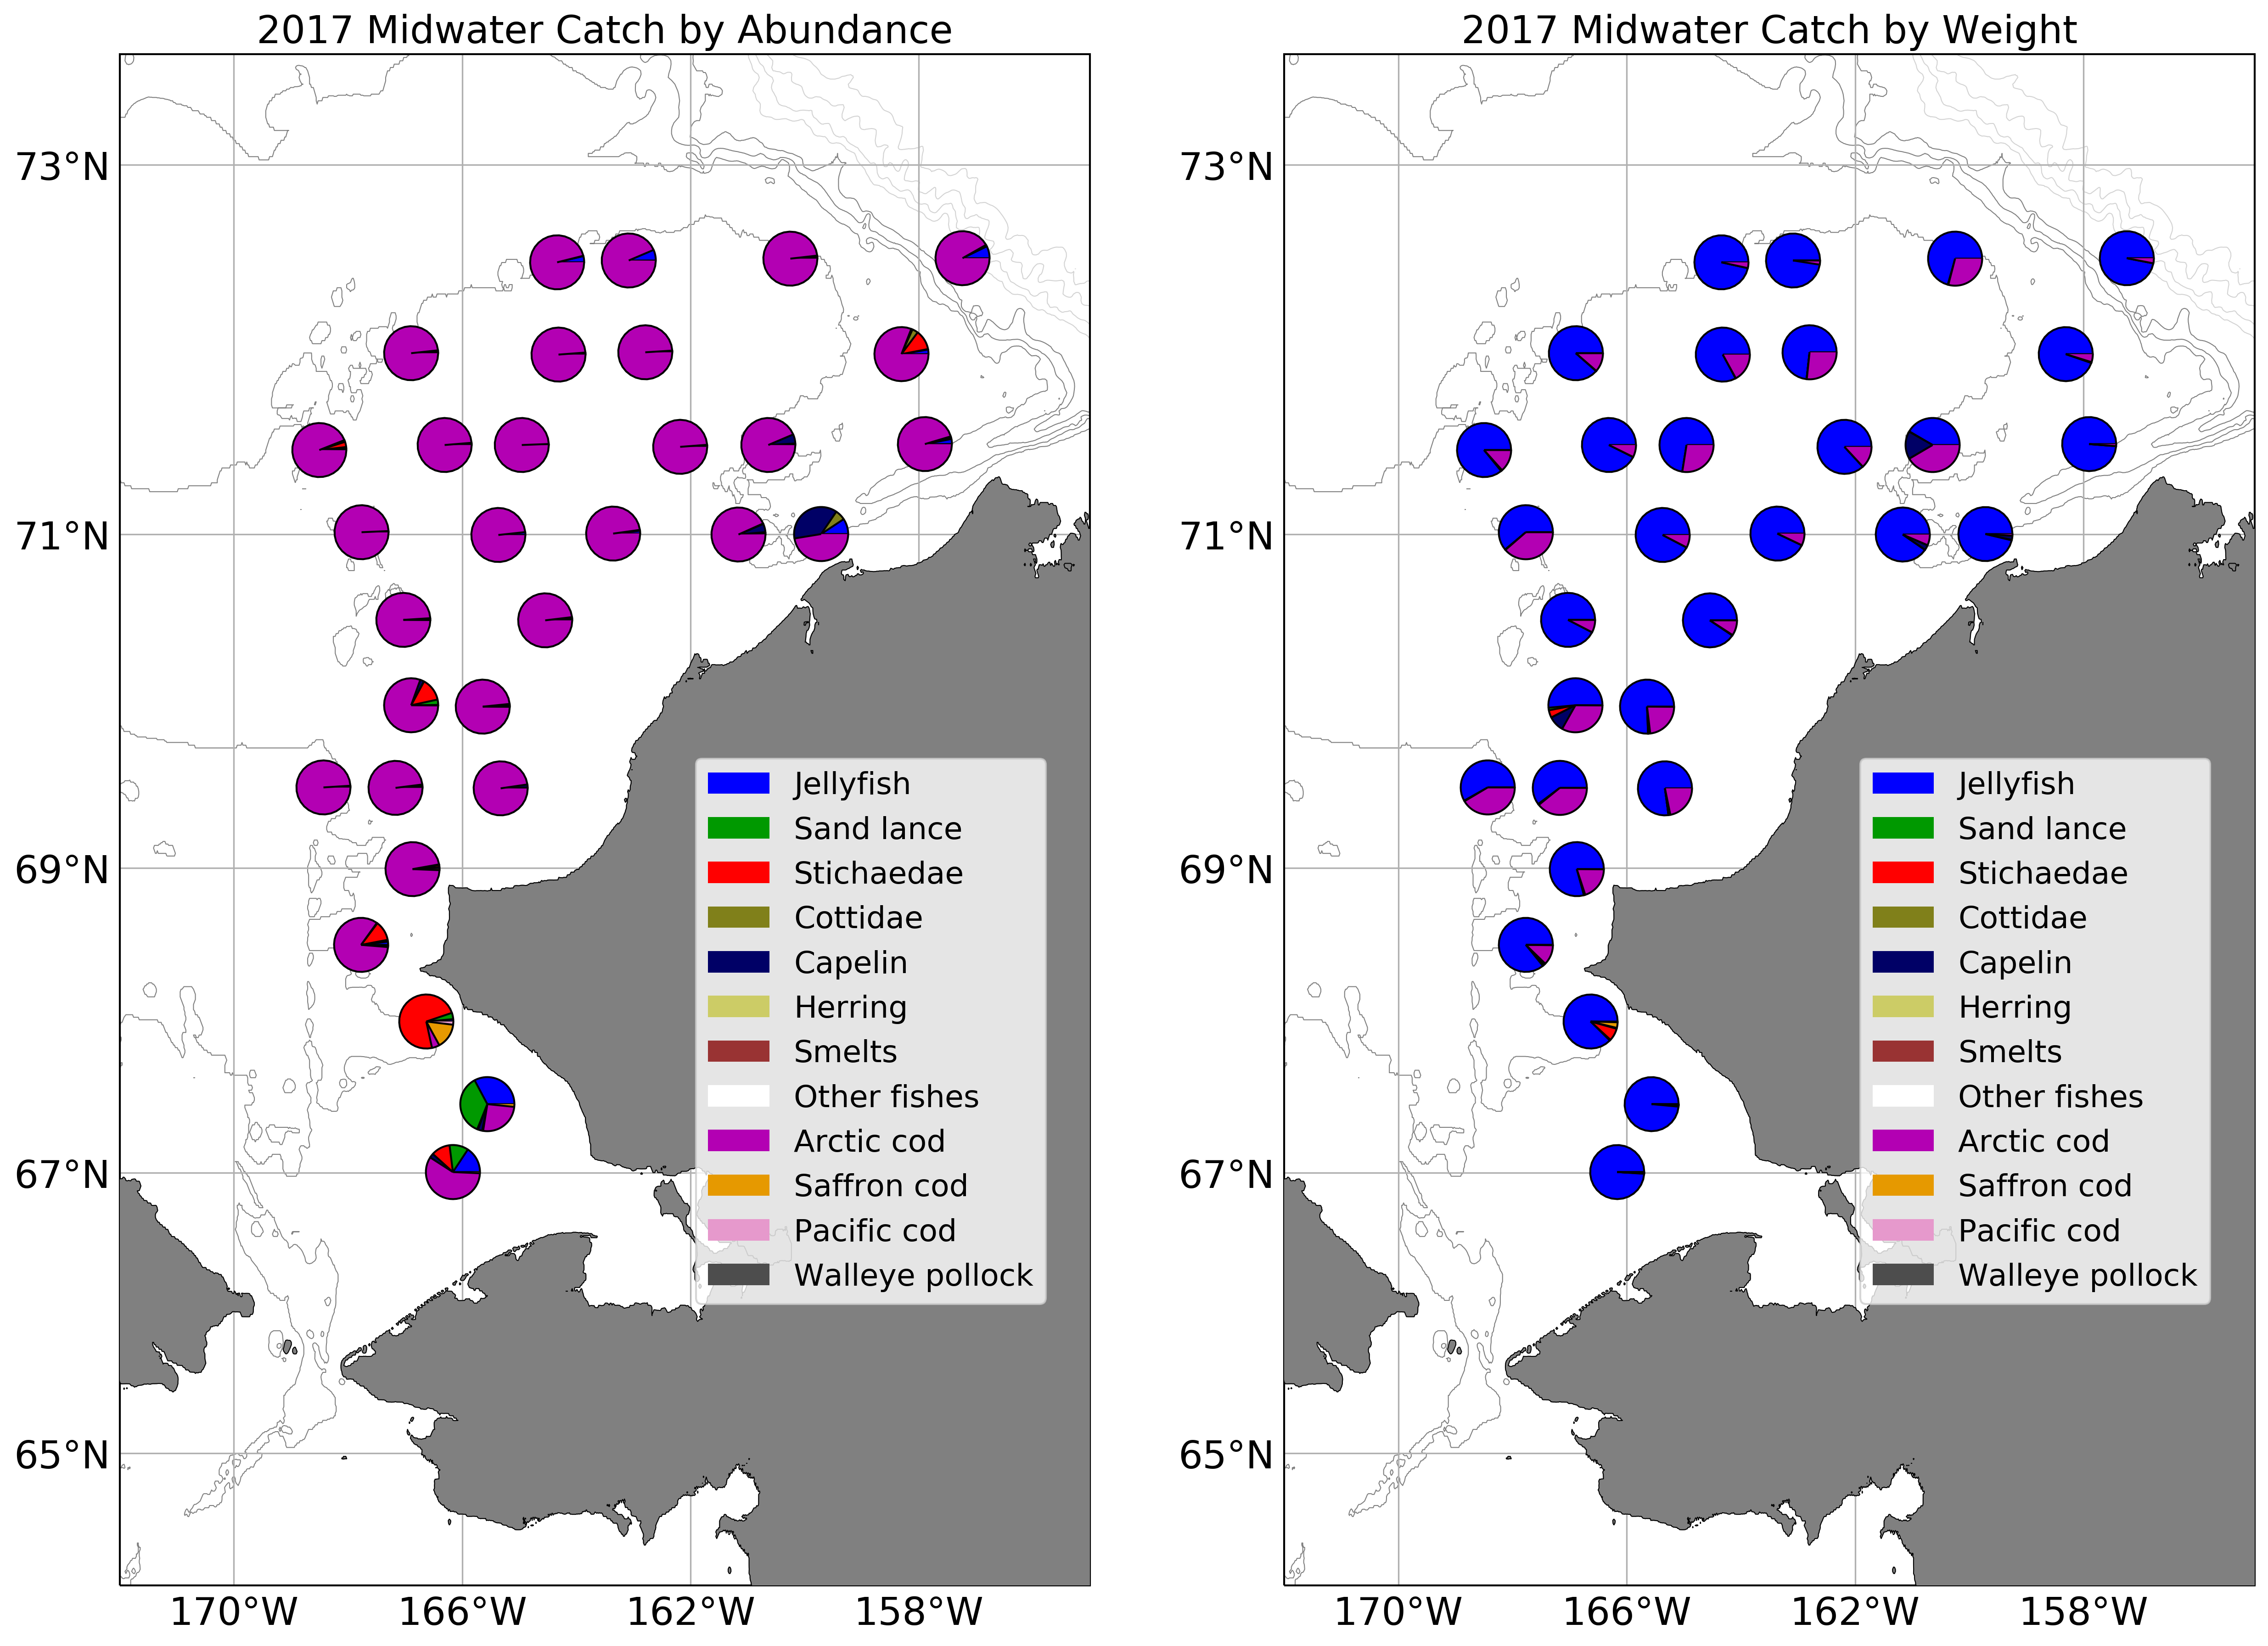

In [49]:
catch = pd.read_csv('D:/AIESII/OS201901/data/databaseExports/catchExport2017.csv')
events = pd.read_csv('D:/AIESII/OS201901/data/databaseExports/eventExport2017.csv')
marEvents, marByGroup = sumByGroup(events,catch)
pieMap(marEvents, marByGroup, 2017)

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:161: SettingWithCopyWarning: 
A

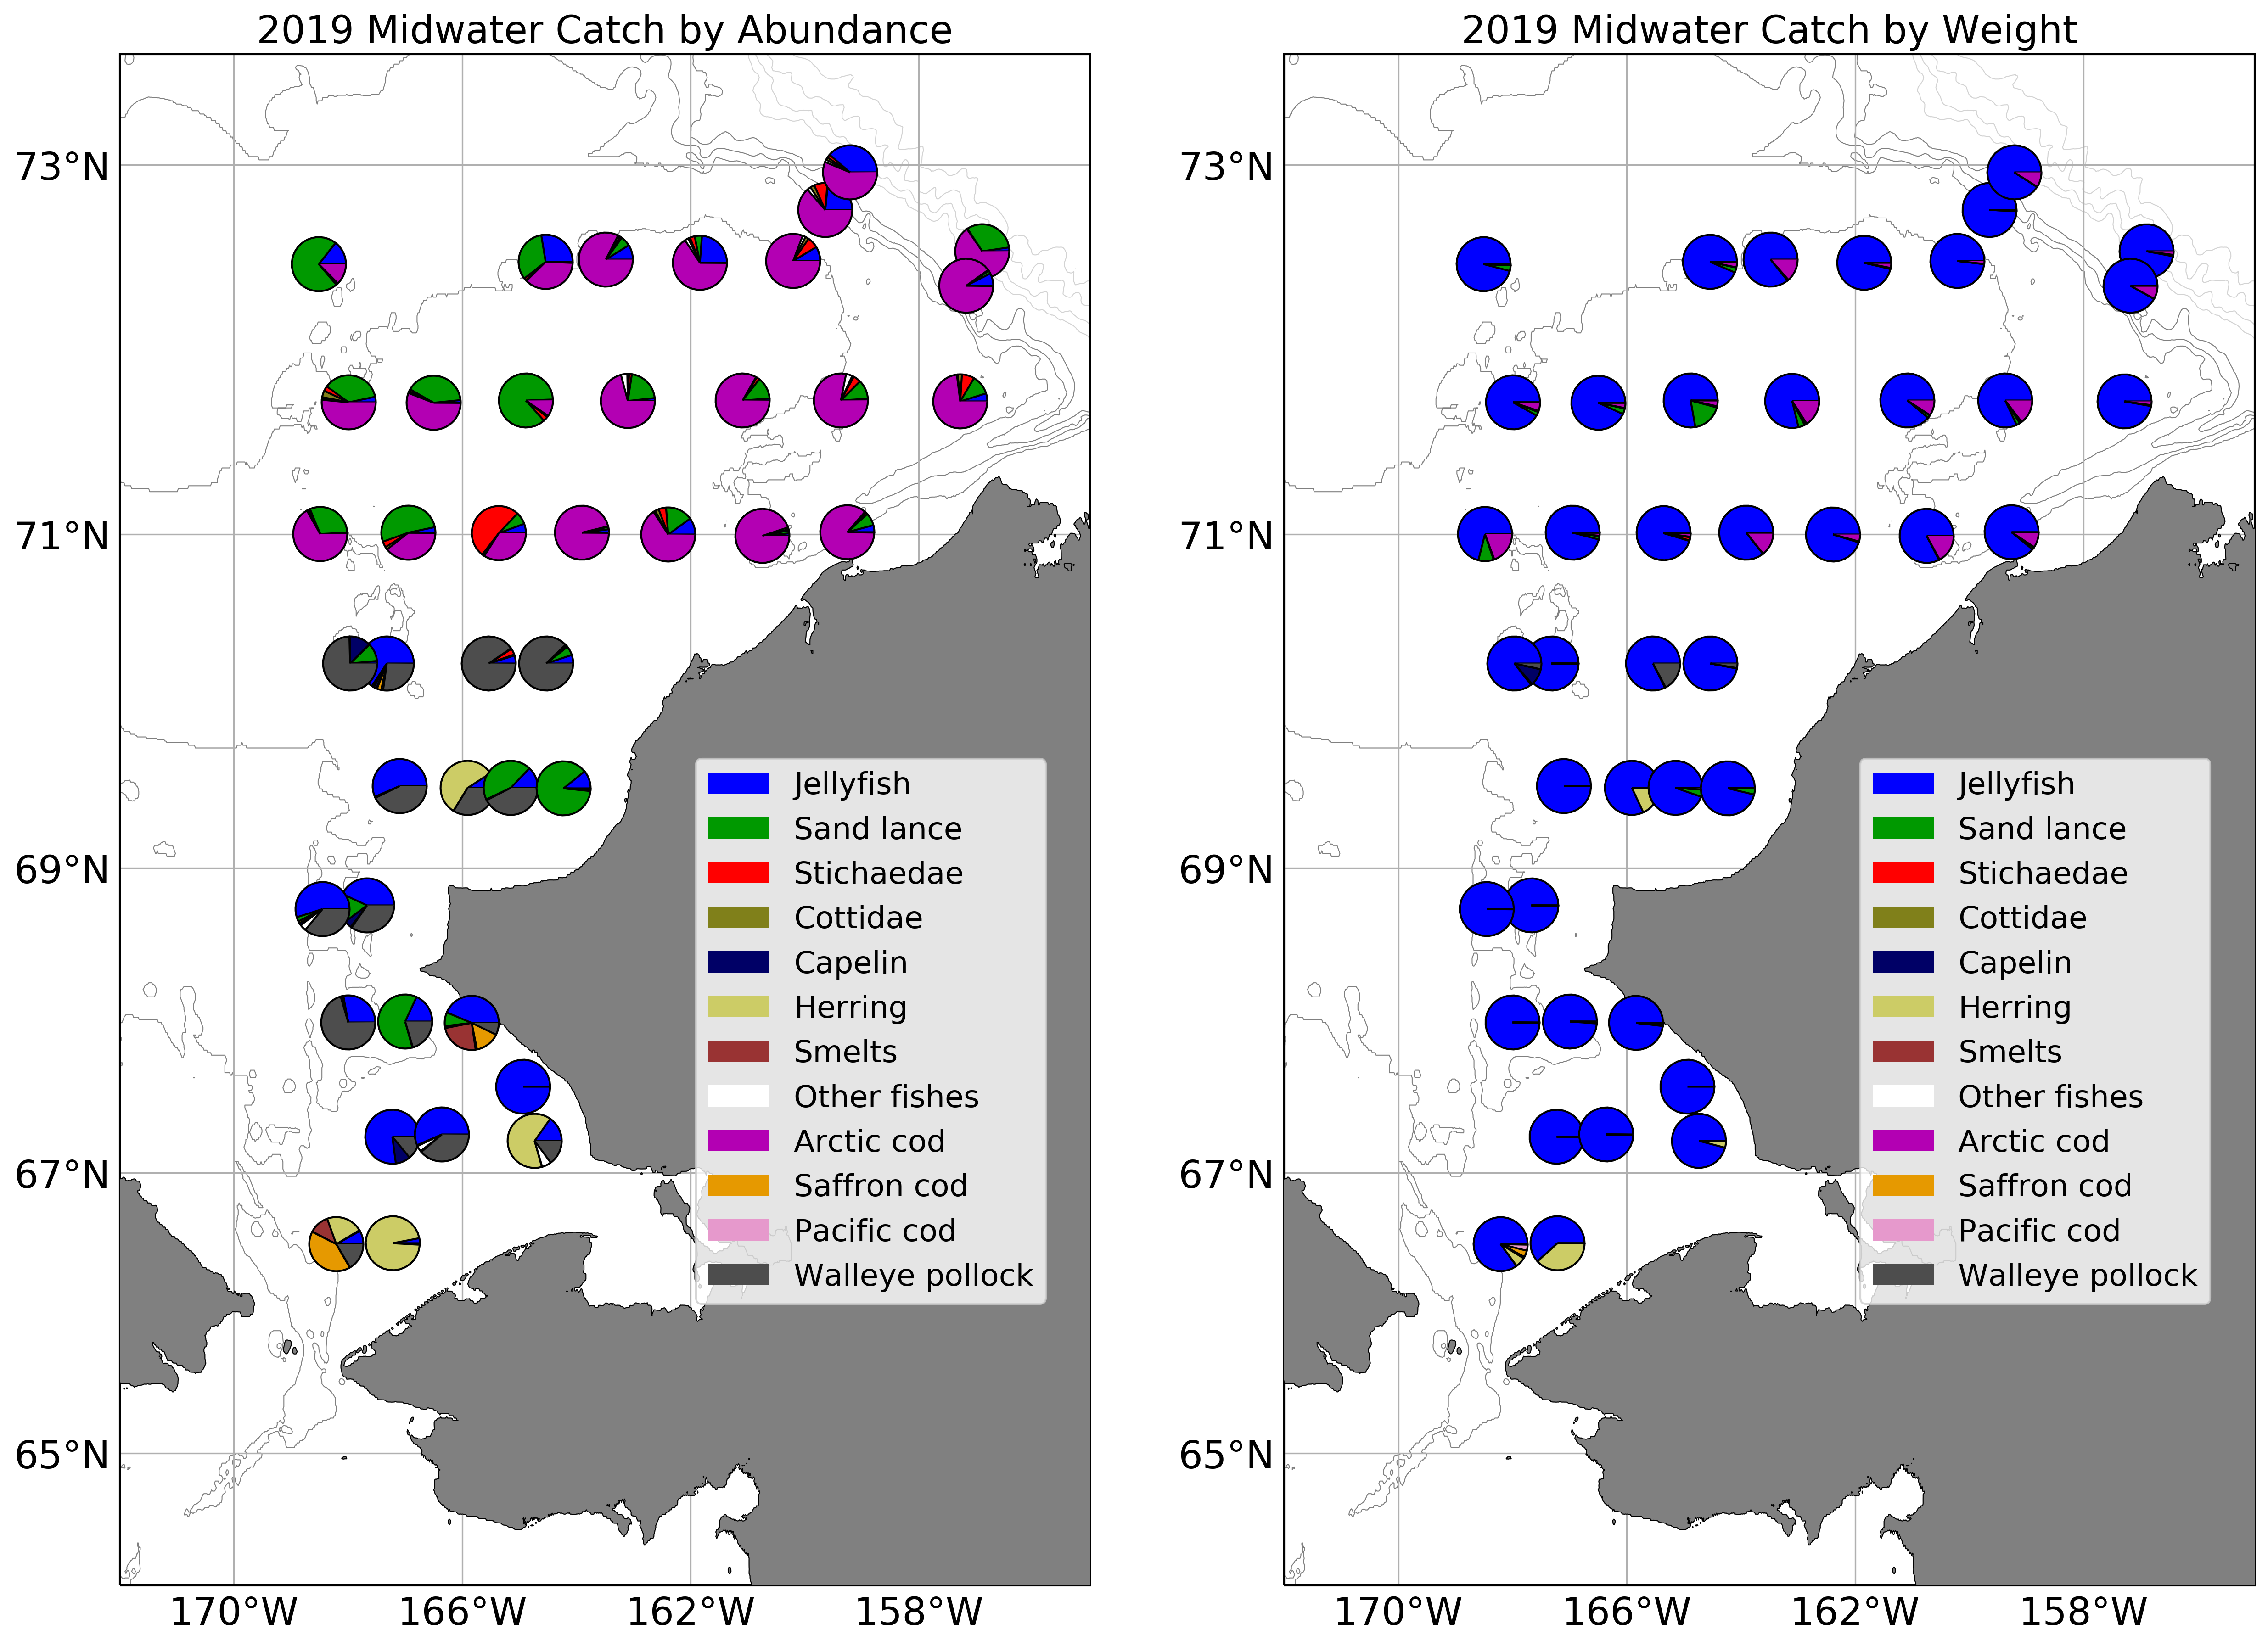

In [55]:
catch = pd.read_csv('D:/AIESII/OS201901/data/databaseExports/catchExport.csv')
events = pd.read_csv('D:/AIESII/OS201901/data/databaseExports/eventExport.csv')
marEvents, marByGroup = sumByGroup(events,catch)
pieMap(marEvents, marByGroup, 2019)

In [56]:
marHR = pd.read_csv('C:/OS201901/data/databaseExports/hrExport.csv')
marHR = marHR[marHR.HRMIN <200]
fig = plt.figure()
ct=1
ax = plt.subplot(111)
for i in range(len(marHR)):
    ax.plot([ct, ct], [marHR.HRMAX.values[i],marHR.HRMIN.values[i]],'k')
    ax.plot(ct, marHR.HRMEAN.values[i],'.k')
    ct+=1
ax.invert_yaxis()
ax.set_ylabel('Depth(m)')
ax.set_xlabel('Tow Number')
ax.legend(['HR Range','HR Mean'])

FileNotFoundError: [Errno 2] File b'C:/OS201901/data/databaseExports/hrExport.csv' does not exist: b'C:/OS201901/data/databaseExports/hrExport.csv'

Look at the percent of abundance of the shole survey each group makes up

In [57]:
ratio = []
for event in marByGroup.event.unique():
    l=[x/sum(marByGroup[marByGroup.event == event].number.values) for x in marByGroup[marByGroup.event == event].number.values]
    for val in l:
        ratio.append(val)
marByGroup['perAbund'] = ratio
groupNames ={1:'Jellyfish',2:'Sand lance',3:'Stichaedae',4:'Cottidae',5:'Capelin',6:'Herring',7:'Other Fishes',
             8:'Invertebrates',21725:'Arctic cod', 21735:'Saffron cod',21720: 'Pacific cod',21740: 'Pollock', 21744:'Age-0 Pollock'}
for g in marByGroup.group.unique():
    print(groupNames[g],np.mean(marByGroup[marByGroup.group == g].perAbund.values))

Jellyfish 0.1930882230438961
Sand lance 0.17245857057392885
Stichaedae 0.026793396874219635
Cottidae 0.0064307537651417095
Capelin 0.007984985794231965
Herring 0.05721803491000573
Other Fishes 0.008785896741466634
Invertebrates 0.009134316099316572
Arctic cod 0.34734627574434457
Saffron cod 0.014486932964074968
Pacific cod 0.0008109244416846644
Age-0 Pollock 0.15546168904768856


In [58]:
sums = marByGroup.groupby(['group']).sum()
g = sums.index.values
[sums[sums.index == g].number/sums.number.sum() for g in sums.index.values]

[group
 1.0    0.055006
 Name: number, dtype: float64, group
 2.0    0.226846
 Name: number, dtype: float64, group
 3.0    0.068348
 Name: number, dtype: float64, group
 4.0    0.006531
 Name: number, dtype: float64, group
 5.0    0.011231
 Name: number, dtype: float64, group
 6.0    0.05154
 Name: number, dtype: float64, group
 7.0    0.001927
 Name: number, dtype: float64, group
 8.0    0.005063
 Name: number, dtype: float64, group
 21720.0    0.000467
 Name: number, dtype: float64, group
 21725.0    0.451727
 Name: number, dtype: float64, group
 21735.0    0.003263
 Name: number, dtype: float64, group
 21744.0    0.11805
 Name: number, dtype: float64]

In [60]:
[sums[sums.index == g].weight/sums.weight.sum() for g in sums.index.values]

[group
 1.0    0.936593
 Name: weight, dtype: float64, group
 2.0    0.009711
 Name: weight, dtype: float64, group
 3.0    0.00105
 Name: weight, dtype: float64, group
 4.0    0.000405
 Name: weight, dtype: float64, group
 5.0    0.004271
 Name: weight, dtype: float64, group
 6.0    0.021584
 Name: weight, dtype: float64, group
 7.0    0.000443
 Name: weight, dtype: float64, group
 8.0    0.000242
 Name: weight, dtype: float64, group
 21720.0    0.001031
 Name: weight, dtype: float64, group
 21725.0    0.015154
 Name: weight, dtype: float64, group
 21735.0    0.001255
 Name: weight, dtype: float64, group
 21744.0    0.00826
 Name: weight, dtype: float64]